Visualización de los datos limpios


En este notebook, se llevará a cabo un análisis exploratorio de los datos finales con los que se desarrollará el proyecto. El objetivo de este análisis es evaluar la calidad y distribución de las variables, identificar posibles patrones o tendencias y establecer las bases para una interpretación rigurosa de los resultados. Esta exploración permitirá definir con mayor precisión la dirección del estudio y optimizar el enfoque metodológico para alcanzar los objetivos planteados.

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [121]:
hospital_triage_data = pd.read_csv(
    r"C:\PFG\PlantillaPFG\data\hospital_triage_data.csv", sep=","
)
hospital_triage_data.head()

,Fecha de atención,Día de la semana,Hora,Nivel de triaje,Zona Básica de Salud,Urbano,Hospital,Área,Provincia,Edad,...,Mes_cos,Festivo,Estación del Año,Turno,Latitud,Longitud,Año_Mes,Año,Día,Mes
0,2023-01-25,MIÉRCOLES,13:19,5.0,Z.B.S. De la Puebla,1.0,C.A.U. Palencia,Palencia,Palencia,61.0,...,0.866025,0,Invierno,Día,42.525301,-4.819077,2023-01,2023,25,1
1,2023-01-27,VIERNES,22:00,3.0,Z.B.S. De la Puebla,1.0,C.A.U. Palencia,Palencia,Palencia,20.0,...,0.866025,0,Invierno,Noche,42.525301,-4.819077,2023-01,2023,27,1
2,2023-01-18,MIÉRCOLES,02:53,5.0,Z.B.S. De la Puebla,1.0,C.A.U. Palencia,Palencia,Palencia,38.0,...,0.866025,0,Invierno,Madrugada,42.525301,-4.819077,2023-01,2023,18,1
3,2023-01-17,MARTES,17:09,4.0,Z.B.S. De la Puebla,1.0,C.A.U. Palencia,Palencia,Palencia,87.0,...,0.866025,0,Invierno,Noche,42.525301,-4.819077,2023-01,2023,17,1
4,2023-01-24,MARTES,11:13,4.0,Z.B.S. De la Puebla,1.0,C.A.U. Palencia,Palencia,Palencia,43.0,...,0.866025,0,Invierno,Día,42.525301,-4.819077,2023-01,2023,24,1


Crearé un histograma, que representa cómo se distribuyen las edades de los pacientes en el conjunto de datos. La idea principal es visualizar cuántos pacientes hay en cada rango de edad.

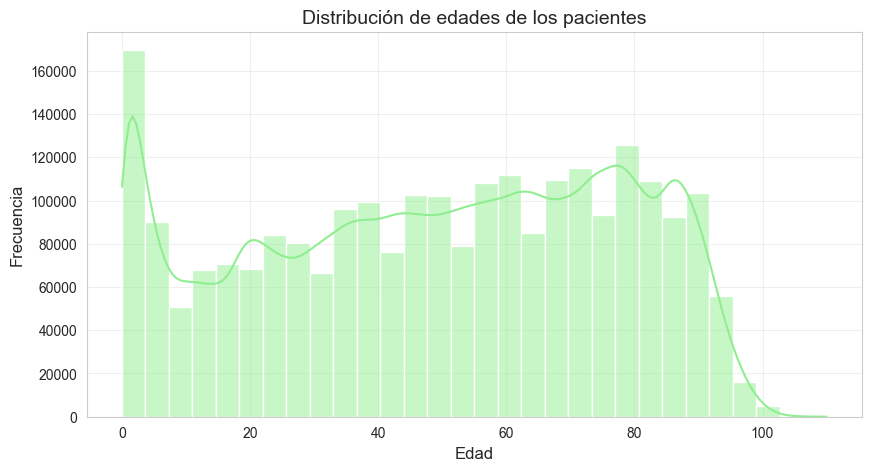

In [122]:
plt.figure(figsize=(10, 5))
sns.histplot(hospital_triage_data["Edad"], bins=30, kde=True, color="lightgreen")
plt.title("Distribución de edades de los pacientes", fontsize=14)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Este gráfico presenta un pico significativo en el grupo de recién nacidos, lo que podría indicar la presencia de datos atípicos que requieren revisión. A partir de los 20 años, la distribución de pacientes se estabiliza, manteniéndose relativamente constante hasta los 60-80 años, donde se observa un incremento, un fenómeno común en hospitales debido a la mayor prevalencia de patologías en esta franja etaria. A partir de los 90 años, la cantidad de pacientes disminuye, lo que es esperable dado el menor número de personas que alcanzan esta edad. Además, la presencia de una curva de densidad permite visualizar de manera más clara la tendencia general de los datos.

In [123]:
num_recien_nacidos = hospital_triage_data[hospital_triage_data["Edad"] == 0].shape[0]
total_pacientes = hospital_triage_data.shape[0]
porcentaje_recien_nacidos = (num_recien_nacidos / total_pacientes) * 100

print(
    f"Pacientes con 0 años: {num_recien_nacidos} ({porcentaje_recien_nacidos:.2f}%) del total"
)

Pacientes con 0 años: 48402 (1.99%) del total


Esto indica que los pacientes que acuden con mayor frecuencia a urgencias son los niños de entre 0 y 5 años, lo que podría estar relacionado con la preocupación de los padres ante cualquier síntoma en sus bebés. Sin embargo, en muchos casos, estos pacientes no presentan un nivel de emergencia elevado, lo que sugiere que gran parte de estas visitas podrían deberse a una percepción de gravedad más que a una urgencia médica real.

Vamos a analizar la distribución de la edad según el nivel de triaje y el género.

KeyboardInterrupt: 

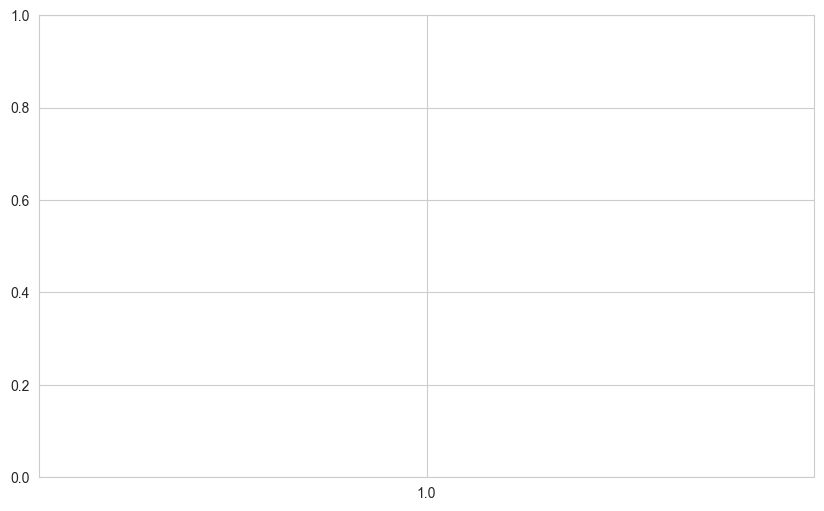

In [124]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.boxplot(
    x="Nivel de triaje", y="Edad", data=hospital_triage_data, color="lightgreen"
)

plt.title("Distribución de la Edad por Nivel de Triaje", fontsize=14)
plt.xlabel("Nivel de Triaje", fontsize=12)
plt.ylabel("Edad", fontsize=12)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


A través del gráfico, podemos observar que las personas jóvenes tienden a acudir a urgencias con niveles de triaje más leves, mientras que la gravedad de los casos aumenta progresivamente con la edad. Esto se debe a que, a medida que envejecemos, las enfermedades crónicas y las afecciones agudas más graves son más frecuentes.

En el caso de las mujeres, la mayor concentración de urgencias con triaje alto ocurre alrededor de los 60 años, coincidiendo con la etapa de postmenopausia, donde pueden aparecer osteoporosis, enfermedades cardiovasculares y trastornos metabólicos que requieren atención urgente.

Por otro lado, en los hombres, el riesgo de enfermedades graves como los infartos, la insuficiencia cardíaca y los problemas prostáticos aumenta con la edad, lo que también explica la presencia de niveles altos de triaje en este grupo.

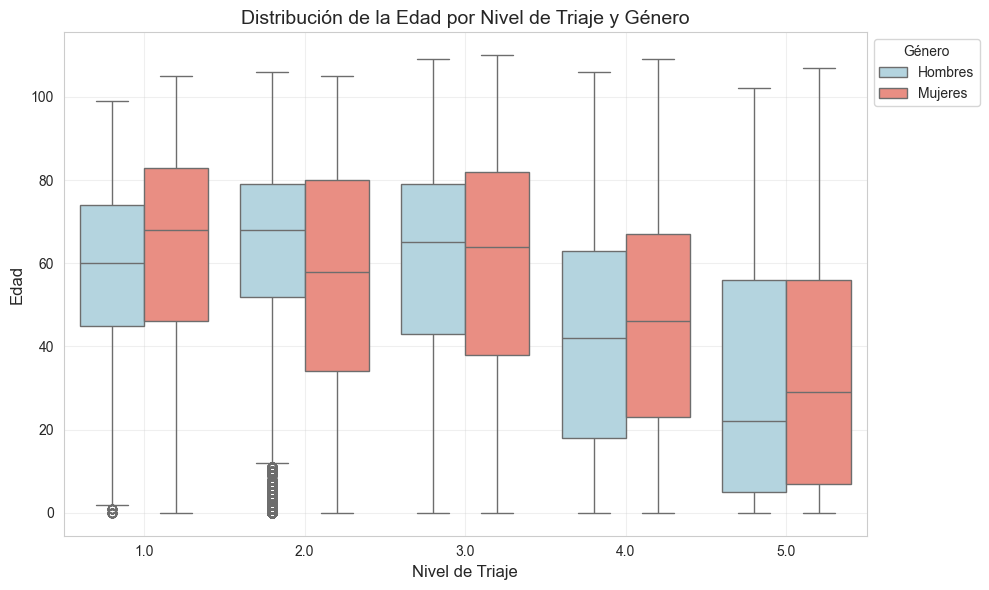

In [ ]:
data_filtrada = hospital_triage_data.dropna(
    subset=["Edad", "Nivel de triaje", "Hombre"]
).copy()

data_filtrada["Hombre"] = (
    data_filtrada["Hombre"].map({0: "Mujeres", 1: "Hombres"}).astype("category")
)

palette_colors = {"Mujeres": "salmon", "Hombres": "lightblue"}

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.boxplot(
    x="Nivel de triaje",
    y="Edad",
    hue="Hombre",
    data=data_filtrada,
    palette=palette_colors,
)

plt.title("Distribución de la Edad por Nivel de Triaje y Género", fontsize=14)
plt.xlabel("Nivel de Triaje", fontsize=12)
plt.ylabel("Edad", fontsize=12)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title="Género", loc="upper left", bbox_to_anchor=(1, 1))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Este diagrama de cajas nos permite analizar las diferencias entre hombres y mujeres en la distribución de la edad dentro de los distintos niveles de triaje en urgencias.  

Podemos observar que en los triajes más graves (1, 2 y 3), la distribución de edad entre hombres y mujeres es similar, aunque con una ligera tendencia a que las mujeres presenten valores más altos en la mediana de edad. Esto podría estar relacionado con el hecho de que las mujeres, en edades avanzadas, tienen una mayor prevalencia de enfermedades crónicas como osteoporosis o enfermedades cardiovasculares postmenopáusicas, lo que podría incrementar su presencia en estos niveles de urgencia.  

Por otro lado, en triajes menos graves (4 y 5), los hombres presentan una distribución de edad más amplia, lo que indica que hay una mayor variabilidad en los casos atendidos. Esto podría deberse a que los hombres jóvenes suelen acudir con patologías menos graves derivadas de accidentes, lesiones deportivas o consultas de menor urgencia, mientras que en edades más avanzadas pueden aparecer afecciones como problemas prostáticos o respiratorios que requieren atención médica sin llegar a ser emergencias críticas.  

En general, este análisis resalta cómo la edad y el género pueden influir en la gravedad de los casos atendidos en urgencias, lo que podría ser útil para optimizar los recursos hospitalarios y mejorar la gestión de pacientes según su perfil demográfico. 

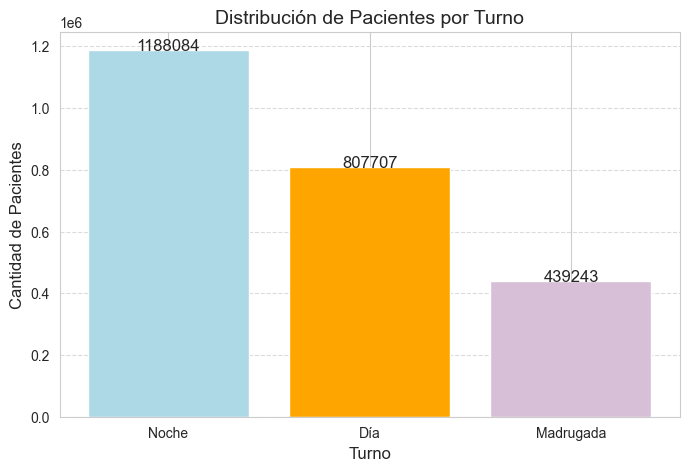

In [ ]:
conteo_turnos = hospital_triage_data["Turno"].value_counts()

# Definir colores para cada turno
colores_dict = {"Día": "orange", "Noche": "lightblue", "Madrugada": "thistle"}

# Crear una lista de colores según el orden de los turnos en conteo_turnos
colores = [colores_dict[turno] for turno in conteo_turnos.index]

plt.figure(figsize=(8, 5))
bars = plt.bar(conteo_turnos.index, conteo_turnos.values, color=colores)

plt.title("Distribución de Pacientes por Turno", fontsize=14)
plt.xlabel("Turno", fontsize=12)
plt.ylabel("Cantidad de Pacientes", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 5,
        str(height),
        ha="center",
        fontsize=12,
    )

plt.show()


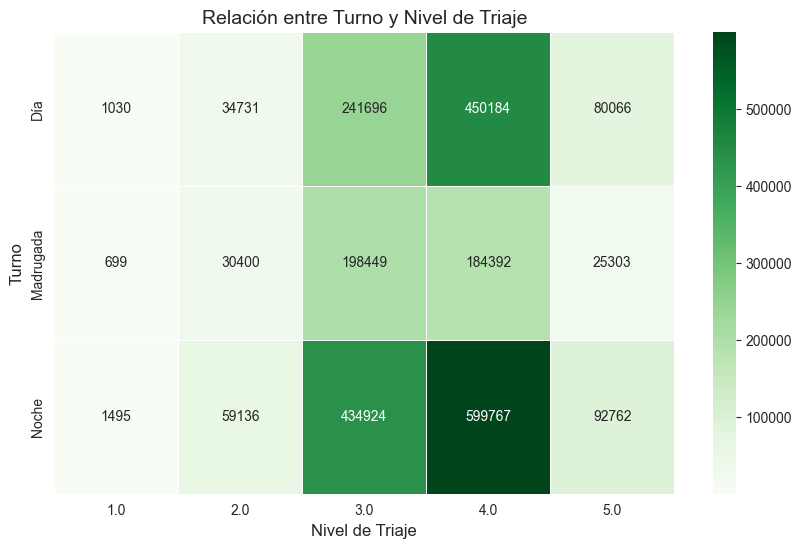

In [ ]:
tabla_turno_triaje = hospital_triage_data.pivot_table(
    index="Turno", columns="Nivel de triaje", aggfunc="size", fill_value=0
)

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_turno_triaje, cmap="Greens", annot=True, fmt="d", linewidths=0.5)

plt.title("Relación entre Turno y Nivel de Triaje", fontsize=14)
plt.xlabel("Nivel de Triaje", fontsize=12)
plt.ylabel("Turno", fontsize=12)

plt.show()

Este mapa de calor muestra cómo se distribuyen los pacientes según el turno y el nivel de triaje en urgencias. Se observa que los niveles 3 y 4 concentran la mayor cantidad de pacientes en todos los turnos, especialmente durante la noche, donde el triaje 4 alcanza su punto más alto. Esto sugiere que en la noche hay una mayor carga de urgencias moderadas, posiblemente por descompensaciones de enfermedades crónicas o consultas diferidas. Durante la madrugada, el volumen de pacientes disminuye, pero los niveles 3 y 4 siguen siendo predominantes, indicando que aunque hay menos afluencia, siguen atendiéndose casos importantes. En el turno de día, la distribución es más equilibrada, aunque con menor carga en los triajes más graves. Los niveles de triaje 1 y 5 son los menos frecuentes en todos los turnos, lo que es esperable, ya que el triaje 1 corresponde a emergencias críticas y el triaje 5 a consultas de baja prioridad. En general, la noche es el turno con mayor demanda en urgencias, lo que implica una mayor carga de trabajo para el personal sanitario.

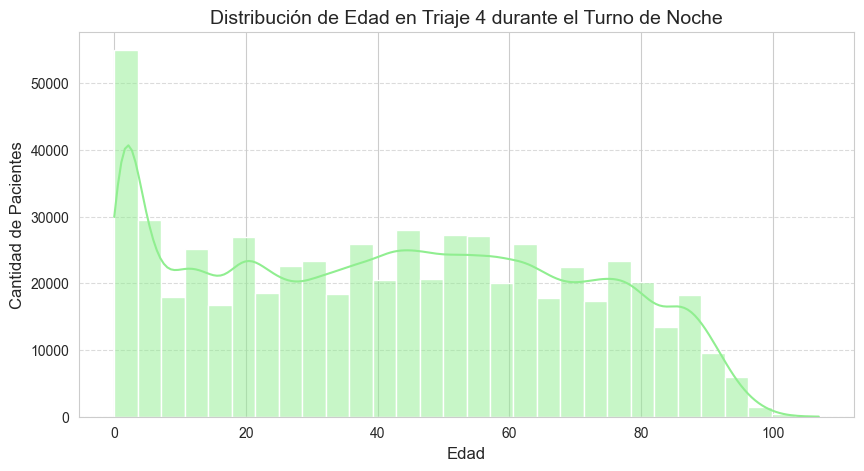

In [ ]:
noche_triaje_4 = hospital_triage_data[
    (hospital_triage_data["Turno"] == "Noche")
    & (hospital_triage_data["Nivel de triaje"] == 4)
]

plt.figure(figsize=(10, 5))
sns.histplot(noche_triaje_4["Edad"], bins=30, kde=True, color="lightgreen")

plt.title("Distribución de Edad en Triaje 4 durante el Turno de Noche", fontsize=14)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Cantidad de Pacientes", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [ ]:
print(hospital_triage_data[hospital_triage_data["Edad"] == 0].shape[0])

print(hospital_triage_data[hospital_triage_data["Edad"] == 0].head())

48402
     Fecha de atención Día de la semana   Hora  Nivel de triaje  \
3014        2023-04-08           SÁBADO  18:50              4.0   
3417        2023-10-01          DOMINGO  22:40              3.0   
3530        2023-08-11          VIERNES  17:30              4.0   
3571        2023-01-08          DOMINGO  10:38              4.0   
3572        2023-01-07           SÁBADO  09:27              4.0   

            Zona Básica de Salud  Urbano          Hospital       Área  \
3014             Z.B.S. Valderas     0.0  C.A.U. Salamanca  Salamanca   
3417  Z.B.S. Cervera de Pisuerga     0.0   C.A.U. Palencia   Palencia   
3530  Z.B.S. Cervera de Pisuerga     0.0   C.A.U. Palencia   Palencia   
3571  Z.B.S. Cervera de Pisuerga     0.0     C.A.U. Burgos     Burgos   
3572  Z.B.S. Cervera de Pisuerga     0.0     C.A.U. Burgos     Burgos   

      Provincia  Edad  ...   Mes_cos Festivo  Estación del Año  Turno  \
3014  Salamanca   0.0  ... -0.500000       0         Primavera  Noche   
3417  

RARO, INVESTIGAR POR QUE TANTOS RECIEN NACIDOS

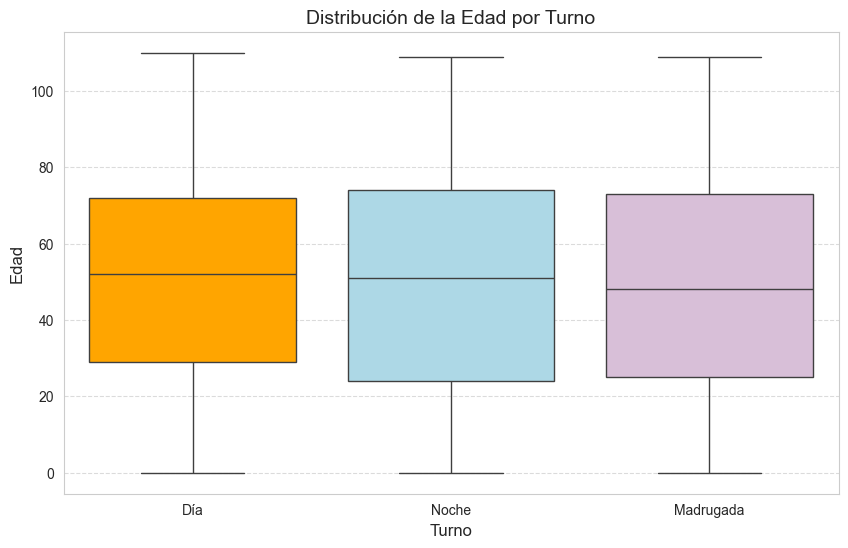

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Turno", y="Edad", data=hospital_triage_data)

for patch, turno in zip(
    ax.patches[: len(colores_dict)], colores_dict.keys(), strict=False
):
    patch.set_facecolor(colores_dict[turno])

plt.title("Distribución de la Edad por Turno", fontsize=14)
plt.xlabel("Turno", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


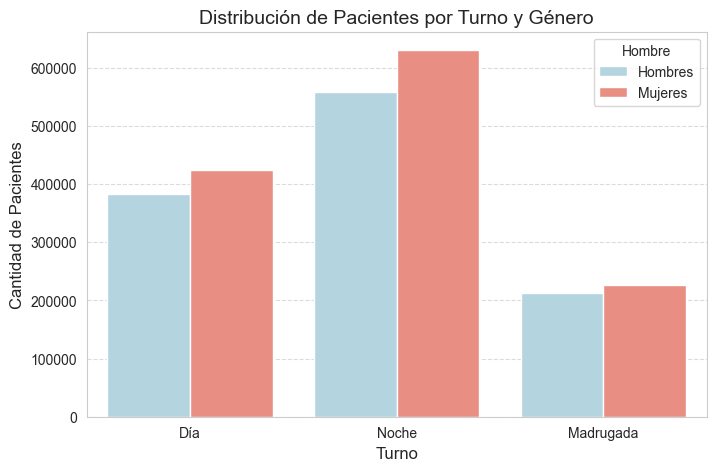

In [ ]:
hospital_triage_data["Hombre"] = hospital_triage_data["Hombre"].map(
    {0: "Mujeres", 1: "Hombres"}
)

plt.figure(figsize=(8, 5))
sns.countplot(
    x="Turno", hue="Hombre", data=hospital_triage_data, palette=["lightblue", "salmon"]
)
plt.title("Distribución de Pacientes por Turno y Género", fontsize=14)
plt.xlabel("Turno", fontsize=12)
plt.ylabel("Cantidad de Pacientes", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


C:\Users\laura\AppData\Local\Temp\ipykernel_23112\2202904982.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.histplot(


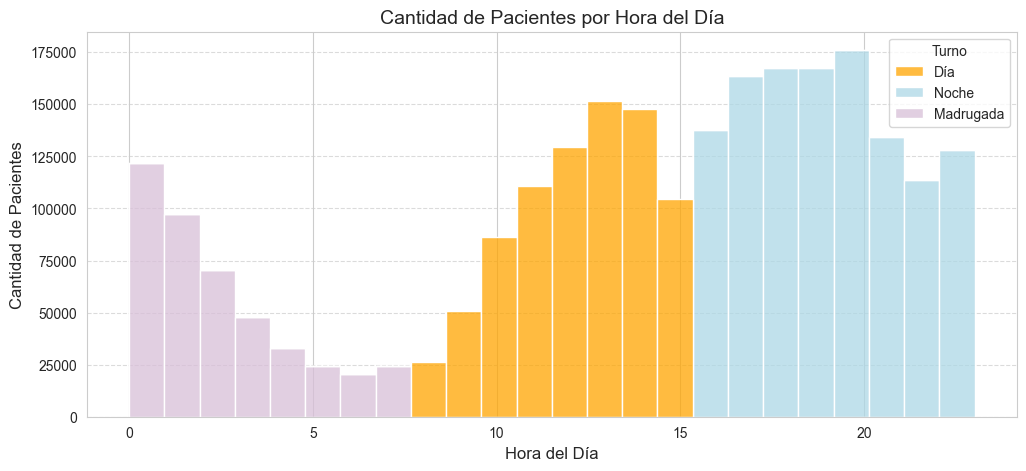

In [ ]:
if not pd.api.types.is_numeric_dtype(hospital_triage_data["Hora"]):
    hospital_triage_data["Hora"] = pd.to_datetime(
        hospital_triage_data["Hora"], format="%H:%M"
    ).dt.hour

hospital_triage_data["Color"] = hospital_triage_data["Turno"].map(colores)

plt.figure(figsize=(12, 5))
ax = sns.histplot(
    data=hospital_triage_data,
    x="Hora",
    hue="Turno",
    multiple="stack",
    bins=24,
    palette=hospital_triage_data["Color"].dropna().unique(),
)

plt.title("Cantidad de Pacientes por Hora del Día", fontsize=14)
plt.xlabel("Hora del Día", fontsize=12)
plt.ylabel("Cantidad de Pacientes", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


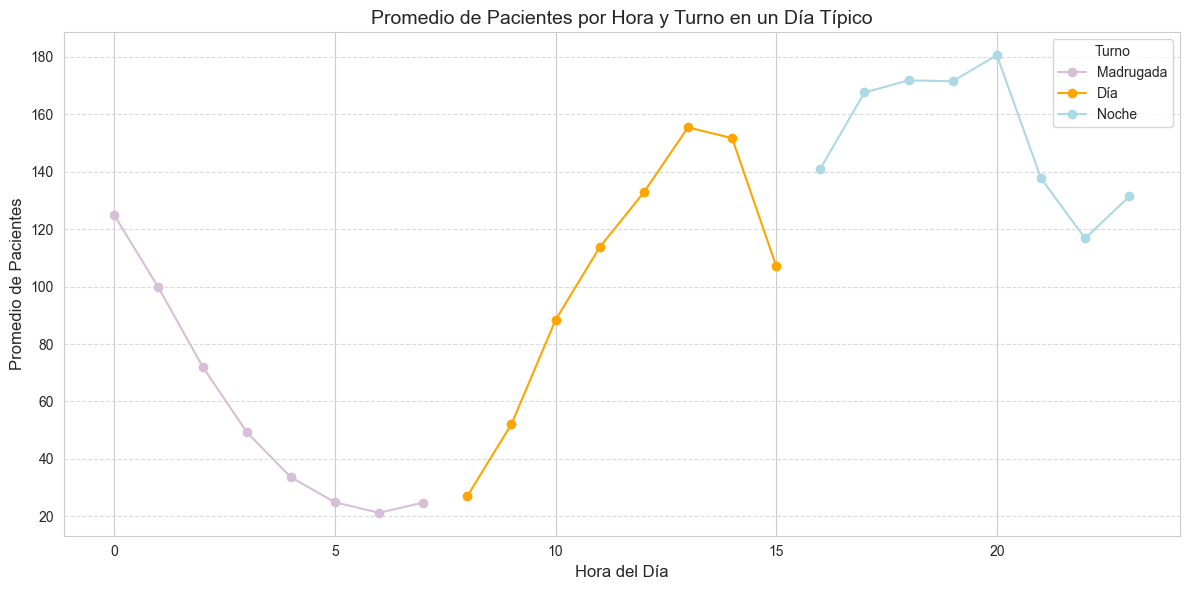

In [ ]:
hospital_triage_data["Fecha"] = pd.to_datetime(
    hospital_triage_data["Fecha de atención"]
).dt.date

pacientes_por_hora_fecha_turno = (
    hospital_triage_data.groupby(["Fecha", "Hora", "Turno"])
    .size()
    .reset_index(name="Pacientes")
)

promedio_por_hora_turno = (
    pacientes_por_hora_fecha_turno.groupby(["Hora", "Turno"])["Pacientes"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))

for turno in promedio_por_hora_turno["Turno"].unique():
    datos_turno = promedio_por_hora_turno[promedio_por_hora_turno["Turno"] == turno]
    plt.plot(
        datos_turno["Hora"],
        datos_turno["Pacientes"],
        label=turno,
        color=colores.get(turno, "gray"),
        marker="o",
    )

plt.title("Promedio de Pacientes por Hora y Turno en un Día Típico", fontsize=14)
plt.xlabel("Hora del Día", fontsize=12)
plt.ylabel("Promedio de Pacientes", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Turno")
plt.tight_layout()
plt.show()


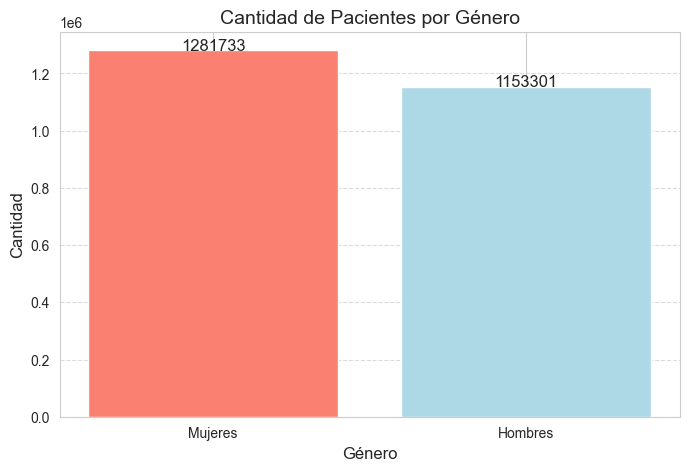

In [ ]:
conteo_genero = (
    hospital_triage_data["Hombre"]
    .map({0: "Mujeres", 1: "Hombres"})
    .value_counts(dropna=False)
)

conteo_genero.index = conteo_genero.index.fillna("Desconocido")

plt.figure(figsize=(8, 5))
plt.bar(
    conteo_genero.index, conteo_genero.values, color=["salmon", "lightblue", "gray"]
)

plt.title("Cantidad de Pacientes por Género", fontsize=14)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, value in enumerate(conteo_genero.values):
    plt.text(i, value + 5, str(value), ha="center", fontsize=12)

plt.show()

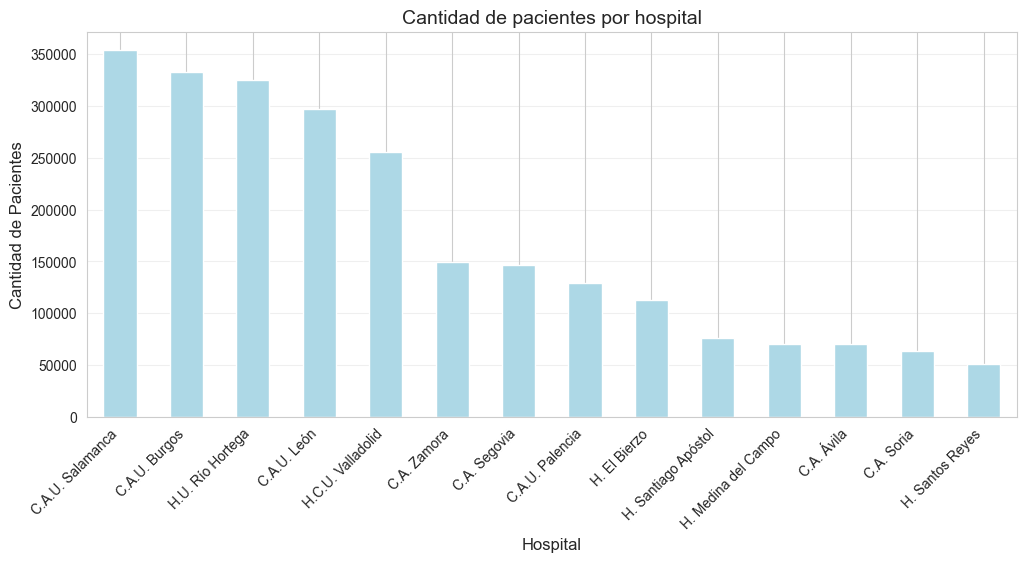

In [ ]:
hospital_counts = hospital_triage_data["Hospital"].value_counts()

plt.figure(figsize=(12, 5))
hospital_counts.plot(kind="bar", color="lightblue")
plt.title("Cantidad de pacientes por hospital", fontsize=14)
plt.xlabel("Hospital", fontsize=12)
plt.ylabel("Cantidad de Pacientes", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()